In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from collections import Counter

random_state = 2525

In [2]:
# データの読み込み
# https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
base = Path('__file__').resolve().parent
csv_path = base / 'marketing_campaign.csv'
df = pd.read_csv(csv_path, delimiter='\t')

<Axes: xlabel='Year_Birth', ylabel='Count'>

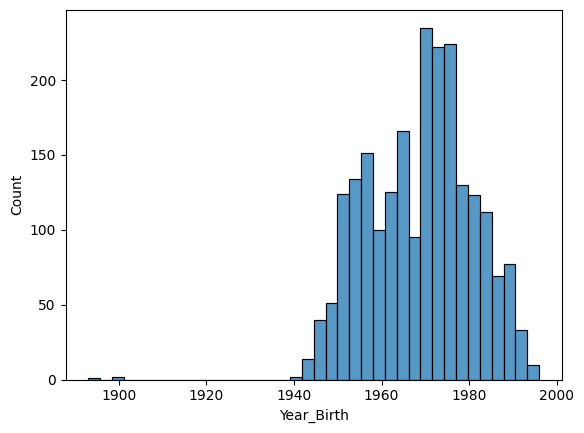

In [3]:
sns.histplot(df['Year_Birth'])

In [4]:
# 異常値と外れ値の削除
df = df.dropna(how='any')
df = df[(df['Year_Birth'] > 1920) & (df['Income'] < 666666)]

# 子供の人数を合算したカラムを追加
df['Childrenhome'] = df['Kidhome'] + df['Teenhome']

In [5]:
# Marital_Statusを２種類に分ける
df.loc[:, 'Marital_Status'] = df['Marital_Status'].mask(df['Marital_Status'] == 'Married', 'Together')
df.loc[:, 'Marital_Status'] = df['Marital_Status'].mask(df['Marital_Status'] == 'Divorced', 'Single')
df.loc[:, 'Marital_Status'] = df['Marital_Status'].mask(df['Marital_Status'] == 'Widow', 'Single')
df.loc[:, 'Marital_Status'] = df['Marital_Status'].mask(df['Marital_Status'] == 'Alone', 'Single')
df = df[df['Marital_Status'].isin(['Together', 'Single'])]

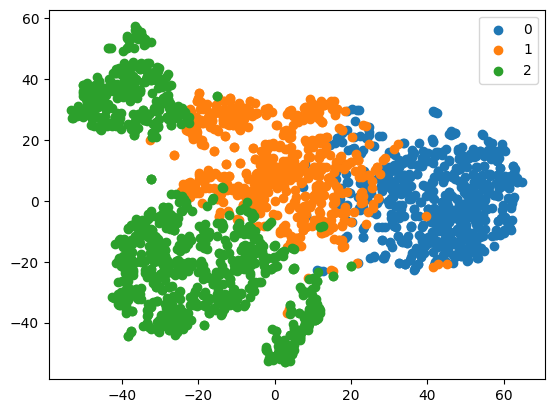

In [6]:
# クラスタリングと可視化
targets = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Year_Birth', 'Income', 'Childrenhome']
df = df[targets]
X = df.to_numpy()
X = StandardScaler().fit_transform(X)
clusters = KMeans(3, n_init='auto', random_state=random_state).fit_predict(X)
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.clf()
for label in sorted(set(clusters)):
    xy = X_embedded[clusters == label]
    plt.scatter(x=xy[:, 0], y=xy[:, 1], label=label)
plt.legend()
plt.show()